In [75]:
# **Bayesian Networks Python**
# In this demo, we’ll be using Bayesian Networks to solve the famous Monty Hall Problem. For those of you who don’t know what the Monty Hall problem is
# The Monty Hall problem named after the host of the TV series, ‘Let’s Make A Deal’, is a paradoxical probability puzzle that has been confusing people 
#for over a decade.
# So this is how it works. The game involves three doors, given that behind one of these doors is a car and the remaining two have goats behind them. 
# So you start by picking a random door, say #2. On the other hand, the host knows where the car is hidden and he opens another door, say #1 
# (behind which there is a goat). Here’s the catch, you’re now given a choice, the host will ask you if you want to pick door #3 instead of your first 
# choice i.e. #2.

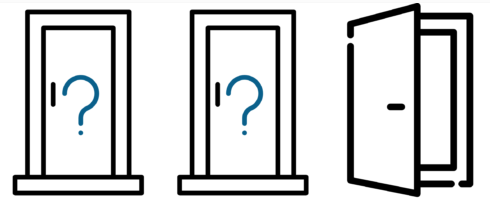

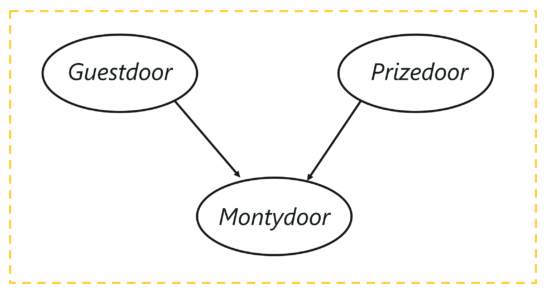

In [76]:
# What is the use of pgmpy?
# pgmpy is a python framework to work with these types of graph models. Several graph models and inference algorithms are implemented in pgmpy.
#Pgmpy also allows users to create their own inference algorithm without getting into the details of the source code of it.

In [77]:
pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [63]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

In [64]:
# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])

In [65]:
import numpy as np
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Define the CPDs
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [
    [0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
    [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
    [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]
], evidence=['Guest', 'Price'], evidence_card=[3, 3])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

In [66]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

In [67]:
model.check_model()

True

In [82]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


In [69]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 1, 'Price': 2})
print(posterior_p)

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      1.0000 |
+---------+-------------+
| Host(1) |      0.0000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


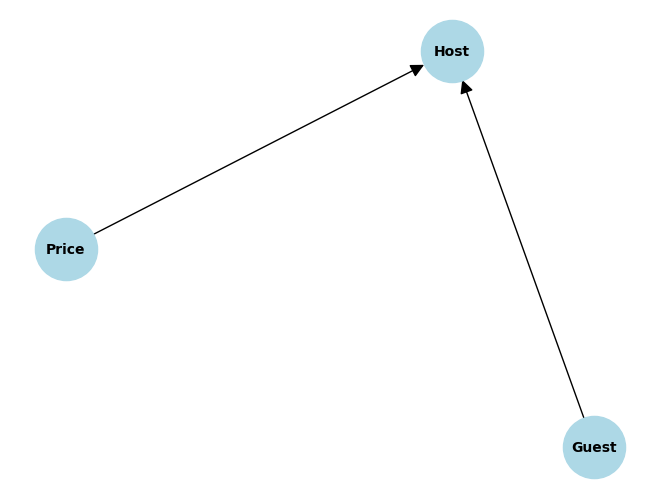

In [74]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel

# Assuming you have already defined and created the 'model' variable as a BayesianModel.
# Convert the Bayesian model to a networkx graph
graph = nx.DiGraph(model.edges())

# Draw the graph using NetworkX
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold', arrowsize=20)

# Show the plot
plt.show()
